# **SAE 15**

**Où en sont les expérimentations sur la 5G ?**

*Toutes les informations présentées dans ce bilan proviennent d'un jeu de données publié par l'ARCEP, répertoriant les expérimentations actuellement menées en France autour de l'utilisation de la 5G.*


### **Tableau 1 : Implication régionale et acteurs les plus engagés**


In [3]:
import csv
import pandas as pd
from tkinter import *
from tkinter import ttk

fenetre = Tk()
fenetre.title("Tableau des acteurs engagés par région")
colonne = ("Région", "Acteurs engagés")
tableau = ttk.Treeview(fenetre, columns=colonne, show="headings")
tableau.column("Région", width=200)
tableau.column("Acteurs engagés", width=800)
tableau.heading("Région",text="Région")
tableau.heading("Acteurs engagés",text="Acteurs engagés")
# Création d'un dictionnaire qui va contenir une liste d'entreprises pour chaque région
regions_dict ={}
# Ouverture du fichier CSV
with open('experimentations_5G.csv', newline='', encoding='cp1252') as file:
    read = csv.reader(file, delimiter=';')
    # Parcours du fichier CSV ligne par ligne
    for i, row in enumerate(read):
        if i!=0:
            entreprise = row[0]  # Entreprise (colonne 0)
            lat=float(row[6].replace(',','.'))
            lon=float(row[7].replace(',','.'))
            if row[11]!='':
                region = row[11]     # Région (colonne 11)
            else : 
                region= row[10]
            # Ajouter l'entreprise à la liste correspondant à la région
            if region not in regions_dict :
                regions_dict[region]=[]
            if entreprise not in regions_dict[region]:
                regions_dict[region].append(entreprise)
df = pd.DataFrame({
    'Région': regions_dict.keys(),
    'Acteurs engagés': regions_dict.values()
})

df = df.sort_values(by='Région').reset_index(drop=True)
for index, row in df.iterrows():
    region = row['Région']
    entreprises = ", ".join(row['Acteurs engagés'])
    tableau.insert("", "end", values=(region, entreprises))

tableau.pack(padx=20, pady=20)
fenetre.mainloop()


Ce **tableau** met en évidence le **niveau d'implication des différentes régions** et les **entreprises** qui y sont **les plus actives**. 

On remarque que des entreprises comme **B-COM**, **Axians**, ou **Orange** sont particulièrement présentes et actives, avec une couverture qui s'étend **à l'ensemble du territoire français**.


### **Graphique 1 : Nombre d'expérimentations 5G par région**



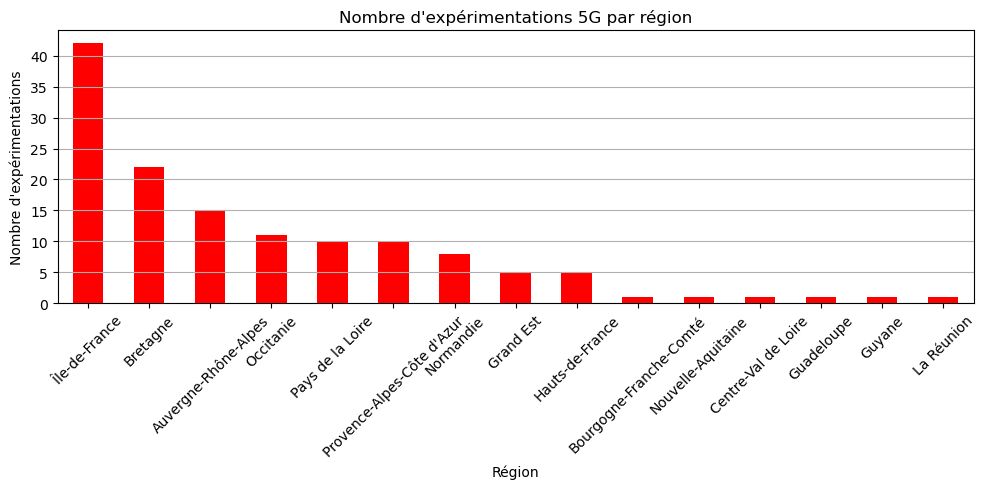

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données avec les paramètres spécifiques
fichier = 'experimentations_5G.csv'
donnée = pd.read_csv(fichier, encoding='cp1252', sep=';', quotechar='"')


# Vérifier les colonnes disponibles
    # print(donnée)

# Exemple : Compter le nombre d'expérimentations par région
experimentateur_region = donnée['Région'].value_counts()
# l'option value_counts compte le nombre ou une valeur dans la serie Région se répéte.
    # print(experimentateur_region)
# Créer un histogramme
plt.figure(figsize=(10, 5))
experimentateur_region.plot(kind='bar', color='red')
plt.title('Nombre d\'expérimentations 5G par région')
plt.xlabel('Région')
plt.ylabel('Nombre d\'expérimentations')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()

Ce graphique met en évidence que **l'Île-de-France se démarquent nettement** en matière d'**expérimentations 5G**. On remarque également **la Bretagne** en deuxième position. Ces deux régions affichent un engagement marqué dans les **domaines des réseaux et des télécommunications**.

- **Île-de-France** : Avec plus de **40 expérimentations**, cette région se distingue en grande partie grâce au **nombre élevé d'entreprises** implantées sur son territoire.  
- **Bretagne** : Avec plus de **20 expérimentations**, la Bretagne conforte son statut de **berceau des télécommunications**. Elle a également investi plus de **15 millions d'euros** entre **2018 et 2021** pour renforcer cette position.

Ces chiffres reflètent le dynamisme de ces régions dans le développement et l'expérimentation des technologies 5G.


### **Graphique 2 : Répartition des sites par entreprise**

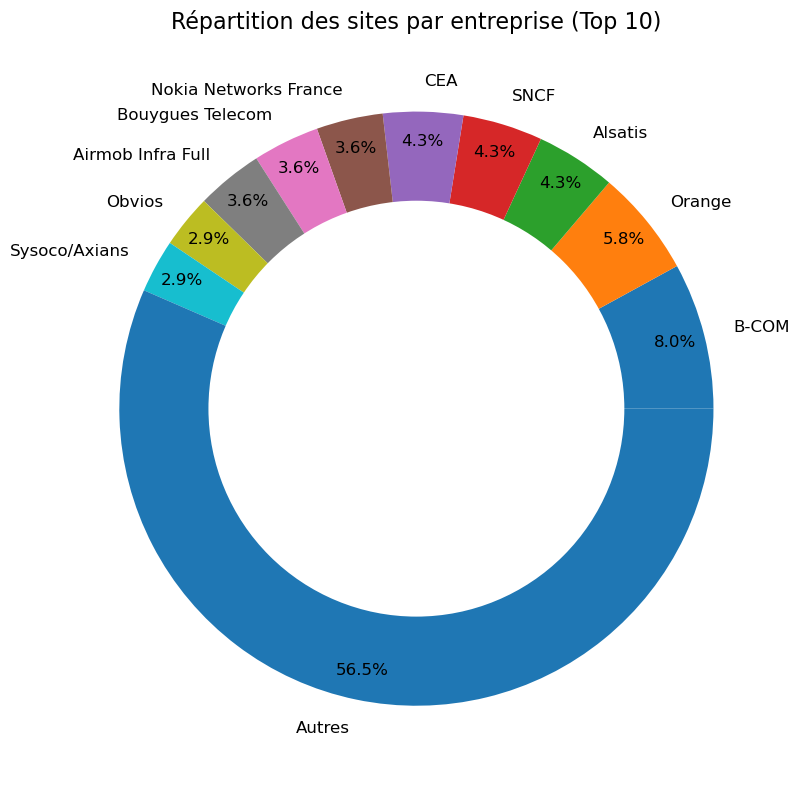

In [3]:
# Compter les sites par entreprise
site_counts = donnée.groupby('Expérimentateur').size().reset_index(name='Nombre de sites')

    #print(site_counts)
# groupby() : permet de regrouper les données selon une ou plusieurs colonnes. 

# .size(): compte le nombre de lignes dans chaque groupe

# reset_index() : Convertit l'index des groupes en colonnes normales, créant un DataFrame.

# name='Nombre de sites' : Renomme la colonne contenant les tailles des groupes en "Nombre de site"

# Trier les entreprises par nombre de sites (ordre décroissant)

site_counts = site_counts.sort_values(by='Nombre de sites', ascending=False) 
#sort_values est une fonction qui permet de trié les données d'un Dataframe donc tableau.
#la fonction ascending=false false permet de trié par ordre décroissant 
# Sélectionner les 10 premières entreprises pour le camembert
top_companies = site_counts[:10]
other_sites_count = site_counts['Nombre de sites'][10:].sum()
# site_counts['nombre de sites']  permet d'utilisé seulement la colone Nombre de sites et de compté à partir de la 11éme ligne puis calculé la somme des sites qui se répéte à l'aide de la fonction sum()

# Ajouter une catégorie "Autres" pour regrouper les entreprises restantes
labels = list(top_companies['Expérimentateur']) + ['Autres']
sizes = list(top_companies['Nombre de sites']) + [other_sites_count]
    # print(sizes)
    # print(labels)
# Couleurs personnalisées pour une meilleure distinction
colors = plt.cm.tab10.colors[:len(sizes)]

# Tracer le camembert
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=0,
    colors=colors,
    textprops={'fontsize': 12}, #Ajuste la taille de la police
    pctdistance=0.9  # Ajuste la position des pourcentages
)

# Ajouter un cercle pour créer un effet de "donut"
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
plt.gca().add_artist(centre_circle)
# cette fonction nous as permis d'ajouter  un cercle vide dans notre cercle créer donc d'avoir un effet donuts

# Titre et style
plt.title('Répartition des sites par entreprise (Top 10)', fontsize=16)
plt.tight_layout() # ajuste automatiquement les marges et espacements des sous-graphiques pour éviter les chevauchements et optimiser la présentation.
plt.show()

Ce graphique illustre la répartition des sites parmi les entreprises ayant le plus grand nombre d'implantations en France. 

- **B-COM** et **Orange** se distinguent en tête en termes d'implémentation :  
  - **B-COM** compte **11 sites**,  
  - **Orange** en compte **8**.  
Ces deux entreprises sont les plus présentes à l'échelle nationale.


### **Graphique 3 : Technologies les plus utilisées par les expérimentateurs**

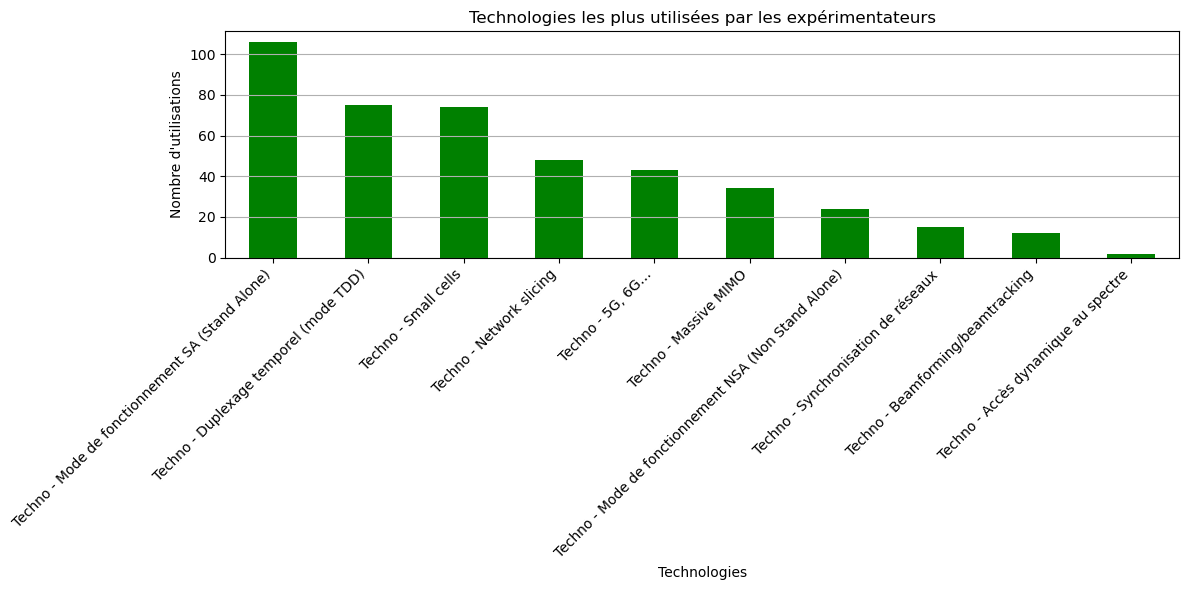

In [4]:
# Sélectionner les colonnes concernant les technologies
tech_colone = [col for col in donnée.columns if 'Techno' in col]
# Compter le nombre d'expérimentateurs utilisant chaque technologie
tech_usage = donnée[tech_colone].sum()
    # print(tech_usage)
# Trier les technologies par utilisation
tech_usage_sorted = tech_usage.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
tech_usage_sorted.plot(kind='bar', color='green')
plt.title('Technologies les plus utilisées par les expérimentateurs')
plt.xlabel('Technologies')
plt.ylabel("Nombre d'utilisations")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout() # fonction qui permet d'ajuster les graphique et les sous graphiques pour évité les chevauchement et d'avoir une meilleur présentation
plt.show()

De nombreuses entreprises réalisent des expérimentations, et il est possible d'observer une variation dans l'utilisation des différentes technologies. 

- **Mode de fonctionnement SA (Stand Alone)** : C'est la technologie la plus utilisée. Elle repose sur un réseau 5G qui dispose de ses propres installations, sans dépendance aux réseaux 4G existants.  
- **Duplexage temporel (mode TDD)** : Cette technologie permet la transmission bidirectionnelle des données sur un même canal de communication, en partageant le temps d'utilisation entre les transmissions montantes (uplink) et descendantes (downlink).  
- **Small cells** : Il s'agit de points d'accès à un réseau de télécommunications mobiles.

À titre de comparaison, la technologie **Stand Alone** est utilisée plus de **deux fois** plus souvent que les expérimentations concernant les technologies **5G** et **6G**, étant la technologie médiane de notre tableau. 